# Unsupervised Learning
#### © Explore Data Science Academy

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Honour Code
We JS7, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Import Libraries and Read In the Data
Do not modify or remove any of the code in these cells.

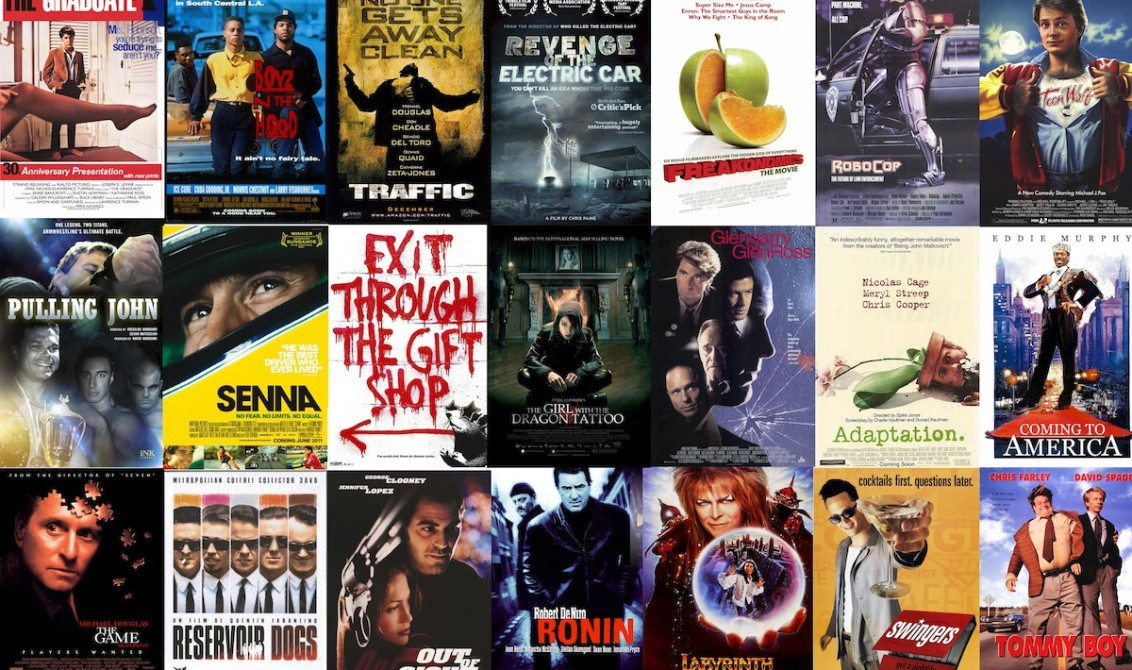

In [47]:
!pip install comet_ml

In [48]:
import comet_ml
from comet_ml import Experiment

# Importing Packages


In [1]:
# Import packages

# Data analysis libraries
import pandas as pd
import numpy as np
import scipy as sp
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Libraries to create models
from sklearn.model_selection import train_test_split as train_test_split_sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')

# Reading Data Sets


In [2]:
# import dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')
imdb_df = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [4]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [5]:
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [6]:


train_df.head()



,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [7]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [8]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [9]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [12]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [13]:


genome_score.head()



,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [14]:
sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


## 1. Data Cleaning

#### Check Missing Values

Check for missing values

In [15]:
print(train_df.isnull().sum())
print(train_df.shape)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
(10000038, 4)


The train dataset has no missing values and has 10000038 values. Let's now check out the movies dataset.

In [16]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Look for duplicates or if there are any missing genres.

In [17]:
movies_df.loc[movies_df["title"].duplicated() == True]
duplicates = movies_df.duplicated(["title"])
print("Number of duplicate rows = "+str(duplicates.sum()))

Number of duplicate rows = 98


We will drop these duplicates later on. Now let's check which movies have no genres.

In [18]:
# check movies with missing genres
movies_df.loc[movies_df["genres"] == "(no genres listed)"].head()

,movieId,title,genres
15881,83773,Away with Words (San tiao ren) (1999),(no genres listed)
16060,84768,Glitterbug (1994),(no genres listed)
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
16491,87061,Trails (Veredas) (1978),(no genres listed)
17404,91246,Milky Way (Tejút) (2007),(no genres listed)


A total of 5062 movies in the dataframe have no genre listed. For simplicity purposes we will rename these to not_listed later on. Another thing that is quite unsettling is the way the movie titles are messy and contain articles after their release year. This leads us to the end of dataframe introspection and into the data cleaning.

#### Dropping columns

In [19]:
#The timestamp does not have any predicitive power and does not give us any usefull information. Knowing when the user gave a rating seems to have no effect. So we drop this column.
df = train_df.copy(deep=True)

In [20]:
df = df.iloc[:, :-1]


In [21]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


#### Drop Duplicates

At least 98 movie titles are duplicated in the movies database at least once. However, the movieId and titles are different. But since it's the same movie,the duplicates need to be deleted. Only keep the title with the most genres as this one has more information. Let us see the difference between the duplicated movies.

In [22]:
# check differences between first & second occurance of title in movies
movies_df.loc[movies_df["title"] == "The Plague (2006)"] 

,movieId,title,genres
27081,128255,The Plague (2006),Documentary|Horror|Thriller
61800,206925,The Plague (2006),Documentary


Inspecting random duplication shows that the first occourance of the movies title has more genres,so we are going to keep first occurance.

In [23]:
# Dropping duplicated movie titles
movies_df = movies_df.drop(
    movies_df.loc[movies_df["title"].duplicated(keep='first') == True].index)

In [24]:
#We then check to see if duplicates have all been removed.
movies_df.loc[movies_df["title"].duplicated(keep='first') == True].count()

movieId    0
title      0
genres     0
dtype: int64

 Now we see that the number of duplicates is zero.
<br>

`Number of duplicate rows = 0`

## Fix genre formats

In the case where the genre is `"(no genre listed)"` , movies to not_listed rename as `"Not_listed"` .This allows for easy manangement of genre column.

In [25]:
movies_df["genres"] = movies_df["genres"].str.replace(
    "(no genres listed)", "Not_listed", regex=False)
# change the separator between genres
movies_df["genres"] = movies_df["genres"].str.replace("|", " ", regex=False)

In [26]:
# Check movies_df
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


### Merge Datasets

Let's merge the datasets. For the purposes of this project we will only fix our focus on the `train_df` and the `movies_df`. Merge the two datasets. Although for the ratings predictions we will not need this dataframe, but when we make movie recommendations we will use it.

In [36]:
# Merge dataframes on common column
df_movie_info = pd.merge(train_df,movies_df,on = "movieId")

We will now create a movies_merge, a datframe that will combine both the movies and imdb dataframes into one that will be useful for the EDA section. This dataframe will contain a new column year, which is a year in which movies were made. In this dataframe, has all the currencies that are not US dollars dropped and the entire column changed to numerical values.

In [37]:
# merge movies_df and imdb_df on a common column ,i.e "movieId"
movies_merge = pd.merge(
    movies_df, imdb_df[['runtime', "movieId", 'budget', ]], on="movieId")
movies_merge['year'] = movies_merge['title'].str.split().str[-1]
movies_merge["year"] = movies_merge["year"].str.replace("(", "", regex=False)
movies_merge["year"] = movies_merge["year"].str.replace(")", "", regex=False)
movies_merge = movies_merge[~movies_merge['year'].str.contains(
    '[A-z]', na=False)]
movies_merge = movies_merge[~movies_merge['year'].str.contains(
    '[a-z]', na=False)]
movies_merge["year"] = movies_merge["year"].astype(float)
movies_merge1 = movies_merge.copy()
movies_merge = movies_merge.dropna()
movies_merge = movies_merge[movies_merge['budget'].str.startswith('$')]
movies_merge["budget"] = movies_merge["budget"].str.replace(
    "$", "", regex=False)
movies_merge["budget"] = movies_merge["budget"].str.replace(
    ",", "", regex=False)
movies_merge["budget"] = movies_merge["budget"].astype(float)

In [38]:
movies_merge.head(1)

,movieId,title,genres,runtime,budget,year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,81.0,30000000.0,1995.0


,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


## 2. Exploratory Data Analysis

### Basic statistics

In [42]:
#Before we dive in EDA, let's first do some basic summary statistics.
print("Summary of df:")
print("Number of unique movies = " + str(len(np.unique(df["movieId"]))))
print("Number of unique users = " + str(len(np.unique(df["userId"]))))
print("Total number of movie ratings = " + str(df.shape[0]))


Summary of df:
Number of unique movies = 48213
Number of unique users = 162541
Total number of movie ratings = 10000038


### User Behavior Analysis

In [43]:
no_of_rated_movies_per_user = df_movie_info.copy(deep=True)
no_of_rated_movies_per_user[
    'user_ratings'] = no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False)
no_of_rated_movies_per_user.groupby(
    by="userId")["rating"].count().sort_values(ascending=False)[:10]

userId
72315     12934
80974      3679
137293     3586
33844      3207
20055      3050
109731     2670
49403      2667
92046      2578
110971     2287
30879      2283
Name: rating, dtype: int64

User 72315 has rated the most movies. 12% of the ratings are from this user.Every user has rated a movie at some point ,with 6 users having only rated one movie. A possible reason why some users have fewer rating than either may be linked to how long they have been with the movie service .Users who have been using the service for a long time are most likely to have the most ratings because they have seem a lot of movies. Let's see if users actually give ratings for movies they liked or movies they did not like.

In [44]:
print("Summary of user ratings: ")
print("Highest number of ratings by single user in database = " + str(
    max(no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False))))

print("Lowest number of ratings by single user of in database = " + str(
    min(no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False))))

Summary of user ratings: 
Highest number of ratings by single user in database = 12934
Lowest number of ratings by single user of in database = 1


NameError: name 'experiment' is not defined

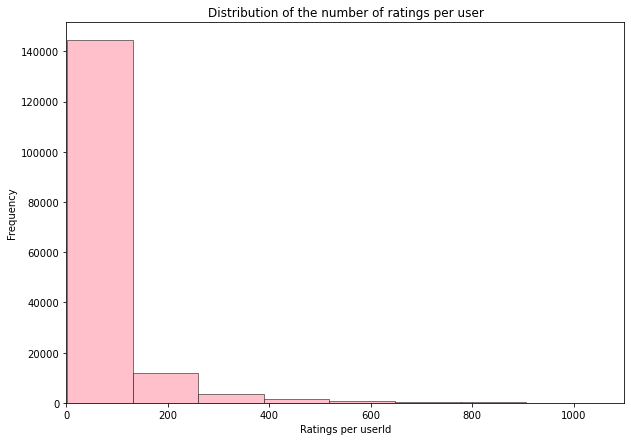

In [49]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of the number of ratings per user')
plt.xlabel('Ratings per userId')
plt.ylabel('Count')
plt.xlim(0, 1100)
no_of_rated_movies_per_user.groupby(
    by="userId")["rating"].count().plot.hist(
        bins=100, color='pink', edgecolor='black', linewidth=0.5)
experiment.log_figure(
    figure=plt, figure_name='Distribution of the number of ratings per user')
plt.grid(False)

plt.show()

## 3. Modeling

In [33]:
# Initialize model
lin_reg = LinearRegression()


# Fit the model
lin_reg.fit(X_train, y_train)


#Create Prediction 
y_pred_1 = lin_reg.predict(X_test)

# Determine RMSE
RMSE_1 = np.sqrt(mean_squared_error(y_test,y_pred_1))

print('RMSE:', RMSE_1)

RMSE: 1.0608717256528812


In [34]:
def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

In [35]:

from sklearn.linear_model import SVD

algo = SVD()

trainset = data.build_full_trainset()
algo.fit(trainset)

testset = trainset.build_testset()
predictions = algo.test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)  # ~ 0.68 (which is low)

ImportError: cannot import name 'SVD' from 'sklearn.linear_model' (C:\Users\27727\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [ ]:
algorithms = ['SVD', 'BaselineOnly', 'NMF']
rmse_scores = [0.84548699, 0.86745023, 0.88901116]
pd.DataFrame(rmse_scores, algorithms, columns=['RMSE'])

In [ ]:
# Define the algorithm
algorithm_svd_tuned = SVD(lr_all=0.009, n_factors=20)

# Build the trainset
trainset = data.build_full_trainset()

# Fit the model
algorithm_svd_tuned.fit(trainset)

## 4. Kaggle Submission 

In [ ]:
def get_predictions(algorithm):
    """
    The functions makes predictions of ratings
    to match them with the user_movie ids.

    Parameters
    -----------
    model : fitted model
    Returns
    -------
    Pandas Dataframe :
        dataframe with user_movie ids and ratings
    """
    # Create a new list to add predictions.
    # Iterate over the test_df, select user and movie.
    # Predict ratings using the algo.predict() method.
    # Append the predictions to the p list.
    X = test_df[['userId', 'movieId']]
    p = []
    for k in range(len(test_df)):
        user = X.iloc[k][0]
        movie = X.iloc[k][1]
        predicted = algorithm.predict(user, movie).est
        p.append(predicted)

    predictions = [round(num, 3) for num in p]

    # Create dataframe for the ratings.
    # Create dataframe for the user_movie ids.
    # Concatenate the two dataframes.
    rate = np.array(predictions)
    rating = pd.DataFrame(rate, columns=['rating'])

    Idd = np.array([str(x)+"_"+str(y) for x, y in test_df[[
        'userId', 'movieId']].values]).reshape(-1, 1)
    Id = pd.DataFrame(Idd, columns=['Id'])

    data_df = pd.concat([Id, rating], axis=1)

    return data_df



In [ ]:
predicted = get_predictions(algorithm_svd_tuned)
predicted.head()

In [ ]:
submit_df = test_df[['Id', 'rating']]

In [ ]:
submit_df.to_csv('kaggel_sub/lin_reg_sub.csv', index = False)

In [ ]:

#Create a dictionary of model names and RMSE scors
eval_dict = {
        "Model": ['LinearRegression'],
        "RMSE": [RMSE_1]
    }
# Create a DataFrame from the dictionary
            eval_df = pd.DataFrame(eval_dict)
        # Sort the Dataframe in ascending RMSE score
            eval_df.sort_values('RMSE',ascending=True)